In [42]:
import pandas as pd
import requests
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import requests

# Introduction

In [44]:
# Replace 'YOUR_API_KEY' with your actual API key from Alpha Vantage
Api_key = 'N5XATG3PC318Z391'

In [45]:
# Define the stock symbol and API end_point URL
# Define the stock symbol and API endpoint URL
Ticket_symbol = 'IBM'
endpoint = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={Ticket_symbol}&outputsize=compact&apikey={Api_key}'


1.Stock_symbol variable means which company stock you want to see eg.(Apple,Ibm) etc.
2.In this end_point variable the formated string is combine the base of Api url with query parameter and they adjusting daily stock price of company which showing in Ticket_symbol variable.

In [46]:

response = requests.get(endpoint)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

1.Used Get Method for retrive the data from a server the source our source is endpoint variable.
2.This condition checks if the HTTP status code of the response is equal to 200.then it will succesful.
3.request to the specified API endpoint, checks if the request is successful, and if so, parses the response as JSON. The JSON data can then be used for further processing or analysis.

In [47]:
 # Extract the daily stock prices for the past 60 trading days
time_series = data['Time Series (Daily)']
trading_days = sorted(time_series.keys(),reverse=True)[:60]

Extracting the past 60 days daily price in decending oreder.the help of time series "key()" dictionary such as dates.

In [48]:
 # Display the adjusted close prices
for day in trading_days:
        adjusted_close = time_series[day]['5. adjusted close']
        print(f'{day}: {adjusted_close}')

2023-06-14: 137.2
2023-06-13: 137.6
2023-06-12: 136.42
2023-06-09: 135.3
2023-06-08: 134.41
2023-06-07: 134.38
2023-06-06: 132.69
2023-06-05: 132.64
2023-06-02: 132.42
2023-06-01: 129.82
2023-05-31: 128.59
2023-05-30: 129.48
2023-05-26: 128.89
2023-05-25: 126.76
2023-05-24: 125.68
2023-05-23: 128.18
2023-05-22: 127.5
2023-05-19: 127.26
2023-05-18: 126.15
2023-05-17: 125.71
2023-05-16: 123.46
2023-05-15: 123.36
2023-05-12: 122.84
2023-05-11: 120.9
2023-05-10: 122.02
2023-05-09: 121.17
2023-05-08: 121.732296670195
2023-05-05: 121.978918016771
2023-05-04: 120.91351379956
2023-05-03: 121.78162093951
2023-05-02: 123.468510950094
2023-05-01: 124.385942359358
2023-04-28: 124.701617682976
2023-04-27: 125.254049499308
2023-04-26: 124.149185866645
2023-04-25: 124.188645282097
2023-04-24: 123.705267442807
2023-04-21: 124.030807620288
2023-04-20: 124.652293413661
2023-04-19: 124.612833998209
2023-04-18: 126.053102662216
2023-04-17: 126.092562077668
2023-04-14: 126.408237401286
2023-04-13: 126.1714

In [49]:
# Create a list of dictionaries for each trading day's data
data_of_list = []
for day in trading_days:
        adjusted_close = int(float(time_series[day]['5. adjusted close']))
        data_of_list.append({'Date': day, 'Adjusted Close': adjusted_close})

In [50]:

New_df = pd.DataFrame(data_of_list)

In [51]:
New_df

,Date,Adjusted Close
0,2023-06-14,137
1,2023-06-13,137
2,2023-06-12,136
3,2023-06-09,135
4,2023-06-08,134
5,2023-06-07,134
6,2023-06-06,132
7,2023-06-05,132
8,2023-06-02,132
9,2023-06-01,129


# Statistical Analysis

In [52]:
average_price = New_df['Adjusted Close'].mean()
std_deviation = New_df['Adjusted Close'].std()

In [53]:
#average_price
std_deviation


4.260546899988972

<AxesSubplot:xlabel='Adjusted Close', ylabel='Count'>

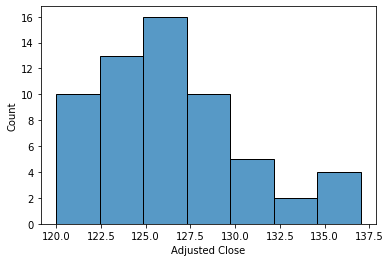

In [54]:
sns.histplot(New_df['Adjusted Close']) 

In [55]:
# Perform linear regression analysis
x = range(len(New_df))
y = New_df['Adjusted Close']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value ** 2

In [56]:
# Display the DataFrame, regression results, and R-squared value
#print("Historical Stock Prices:")
#print(New_df)
print(f"\nAverage Price: {average_price:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"\nRegression Analysis:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_squared:.2f}")


Average Price: 126.52
Standard Deviation: 4.26

Regression Analysis:
Slope: -0.11
Intercept: 129.75
R-squared: 0.20


# Forecasting the stock prices for next 10 days

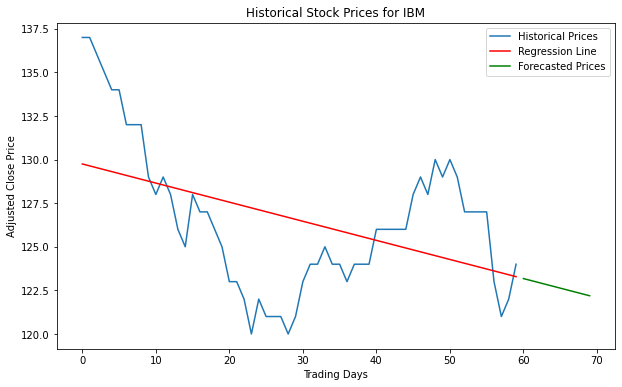

In [57]:
# Plot the historical stock prices with regression line and forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Historical Prices')
plt.plot(x, slope * x + intercept, 'r-', label='Regression Line')
plt.plot(forecast_days, forecast_prices, 'g-', label='Forecasted Prices')
plt.xlabel('Trading Days')
plt.ylabel('Adjusted Close Price')
plt.title(f'Historical Stock Prices for {Ticket_symbol}')
plt.legend()
plt.savefig("stock_prices.png", dpi=300)
plt.show()


In [58]:
 # Generate a random sequence of integers using the forecasted prices
random_sequence = [random.randint(int(price - std_deviation), int(price + std_deviation)) for price in forecast_prices]


In [59]:
random_sequence

[124, 125, 126, 118, 126, 123, 124, 119, 120, 119]

In [69]:

print("\nForecasted Stock Prices:")
for day, price in zip(forecast_days, forecast_prices):
        print(f"Day {day}: {price:.2f}")


Forecasted Stock Prices:
Day 60: 123.18
Day 61: 123.07
Day 62: 122.96
Day 63: 122.85
Day 64: 122.74
Day 65: 122.63
Day 66: 122.52
Day 67: 122.41
Day 68: 122.30
Day 69: 122.19


# Conclusion